<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Exam_preparation/nlp_us_airline_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Airline Tweets text classification

In [1]:
#Download helper functions file
!wget https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/helper_functions.py

--2021-09-08 15:36:15--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5005 (4.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   4.89K  --.-KB/s    in 0s      

2021-09-08 15:36:15 (78.1 MB/s) - ‘helper_functions.py’ saved [5005/5005]



## Data preparation

In [2]:
#Download dataset 
!wget https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/Tweets.csv

--2021-09-08 15:36:16--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/Tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/plain]
Saving to: ‘Tweets.csv’

Tweets.csv          100%[===================>]   3.26M  --.-KB/s    in 0.07s   

2021-09-08 15:36:17 (46.5 MB/s) - ‘Tweets.csv’ saved [3421431/3421431]



In [3]:
# Load in the dataset 
import pandas as pd
df = pd.read_csv("/content/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
#How many different sentiments
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [5]:
#Visualize some random examples
import random
random_index = random.randint(0, len(df)-5)
for row in df[["text", "airline_sentiment"]][random_index:random_index+5].itertuples():
  _, text, sentiment = row
  print(f"Text: {text}")
  print(f"Rating: {sentiment}\n")

Text: @virginamerica What is your phone number. I can't find who to call about a flight reservation.
Rating: negative

Text: @VirginAmerica is anyone doing anything there today?  Website is useless and no one is answering the phone.
Rating: negative

Text: @VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM
Rating: neutral

Text: @VirginAmerica why must a traveler miss a flight to Late Flight check a bag?  I missed my morning appointments and you lost my business. #sfo2lax
Rating: negative

Text: @VirginAmerica check out new music http://t.co/maRcnOCWzn
Rating: neutral



## Remove different strings

In [6]:
# Remove Smileys, @, # and links
import re
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

for index, row in enumerate(df["text"]):
  row = re.sub(r'http\S+', '', row)
  row = re.sub(r'@', '', row)
  row = re.sub(r'#', '', row)
  row = emoji_pattern.sub(r'', row)
  df["text"][index] = row

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [7]:
#Visualize some random examples after cleaning
import random
random_index = random.randint(0, len(df)-5)
for row in df[["text", "airline_sentiment"]][random_index:random_index+5].itertuples():
  _, text, sentiment = row
  print(f"Text: {text}")
  print(f"Rating: {sentiment}\n")

Text: AmericanAir thanks!
Rating: positive

Text: AmericanAir well Done all of you xx
Rating: positive

Text: AmericanAir Thanks. Having issues checking in for flight, please check our DM convo for more info.
Rating: positive

Text: AmericanAir You don't care about keeping your customers safe or at least you didn't care about my sister
Rating: negative

Text: AmericanAir maybe you should stop tweeting and start calling. Or make it available for people to wait on-hold instead of hanging up on us.
Rating: negative



## Remove stopwords

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df["text_stopwords"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))

In [49]:
#Visualize some random examples after removing stop words
import random
random_index = random.randint(0, len(df)-5)
for row in df[["text_stopwords", "text", "airline_sentiment"]][random_index:random_index+5].itertuples():
  _, text_without_stopwords, text, sentiment = row
  print(f"Text with stopwords: {text}")
  print(f"Text without stopwords: {text_without_stopwords}")
  print(f"Rating: {sentiment}\n")

Text with stopwords: USAirways I have two tight connections in Charlotte and Frankfurt
Text without stopwords: USAirways I two tight connections Charlotte Frankfurt
Rating: negative

Text with stopwords: USAirways Said only way to get on plane about to leave that would make my connection was a $75 fee. Instead of earlier, I am now Late Flightr!
Text without stopwords: USAirways Said way get plane leave would make connection $75 fee. Instead earlier, I Late Flightr!
Rating: negative

Text with stopwords: USAirways thank you! I will be calling you! CheapOairChat
Text without stopwords: USAirways thank you! I calling you! CheapOairChat
Rating: positive

Text with stopwords: USAirways ur "response" was: my "inconvenience was of no matter." U wanted me sit for 3 xtra nights in the city w/out comp! donotflyusair
Text without stopwords: USAirways ur "response" was: "inconvenience matter." U wanted sit 3 xtra nights city w/out comp! donotflyusair
Rating: negative

Text with stopwords: USAirway

## Split dataset

In [11]:
import numpy as np
np.random.seed(42)
perm = np.random.permutation(df.index)
m = len(df)
train_end = int(0.6 * m)
validate_end = int(0.2 * m) + train_end
train = df.iloc[perm[:train_end]]
validate = df.iloc[perm[train_end:validate_end]]
test = df.iloc[perm[validate_end:]]

In [12]:
len(train), len(validate), len(test)

(8784, 2928, 2928)

In [13]:
#Turn dataframes into numpy arrays without stopwords
train_sentences = train["text_stopwords"].to_numpy()
train_labels = train["airline_sentiment"].to_numpy()
val_sentences = validate["text_stopwords"].to_numpy()
val_labels = validate["airline_sentiment"].to_numpy()
test_sentences = test["text_stopwords"].to_numpy()
test_labels = test["airline_sentiment"].to_numpy()
train_sentences.shape, val_sentences.shape, test_sentences.shape

((8784,), (2928,), (2928,))

In [44]:
#Turn dataframes into numpy arrays with stopwords
train_sentences_with_stopwords = train["text"].to_numpy()
val_sentences_with_stopwords = validate["text"].to_numpy()
test_sentences_with_stopwords = test["text"].to_numpy()
train_sentences_with_stopwords.shape, val_sentences_with_stopwords.shape, test_sentences_with_stopwords.shape

((8784,), (2928,), (2928,))

## One-hot encode labels

In [14]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_labels.reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_labels.reshape(-1, 1))

In [15]:
train_labels_one_hot[:10]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [16]:
import tensorflow as tf
#Turn data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

#Prefetch dataset
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [17]:
train_dataset

<PrefetchDataset shapes: ((None,), (None, 3)), types: (tf.string, tf.float64)>

In [51]:
#Turn data into TensorFlow Datasets
train_dataset_with_stopwords = tf.data.Dataset.from_tensor_slices((train_sentences_with_stopwords, train_labels_one_hot))
val_dataset_with_stopwords = tf.data.Dataset.from_tensor_slices((val_sentences_with_stopwords, val_labels_one_hot))
test_dataset_with_stopwords = tf.data.Dataset.from_tensor_slices((test_sentences_with_stopwords, test_labels_one_hot))

#Prefetch dataset
train_dataset_with_stopwords = train_dataset_with_stopwords.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_with_stopwords = val_dataset_with_stopwords.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset_with_stopwords = test_dataset_with_stopwords.batch(32).prefetch(tf.data.AUTOTUNE)

In [52]:
train_dataset_with_stopwords

<PrefetchDataset shapes: ((None,), (None, 3)), types: (tf.string, tf.float64)>

## Create Text Vectorization layers

In [18]:
#Find average number of words in training sentences
sent_len = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_len)
avg_sent_len

11.504895264116575

(array([ 688., 1704., 2360., 2927., 1021.,   81.,    3.]),
 array([ 1.,  5.,  9., 13., 17., 21., 25., 29.]),
 <a list of 7 Patch objects>)

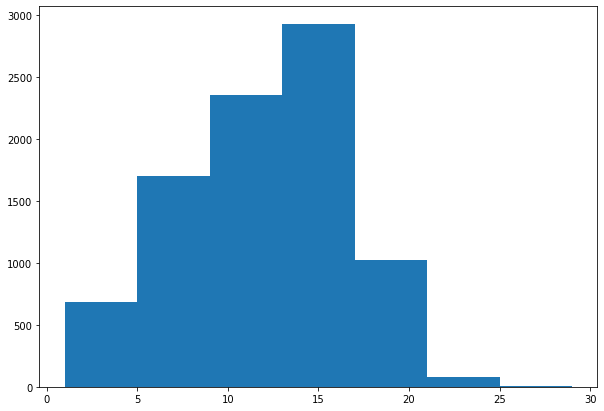

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(sent_len, bins=7)

In [20]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_len, 95))
output_seq_len

18

In [96]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_length = 5000
max_length = output_seq_len

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [97]:
#Fit vectorizer to train sentences
text_vectorizer.adapt(train_sentences)

## Create Embedding layer

In [98]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=32,
                             embeddings_initializer="uniform",
                             input_length=max_length)

## Modelling experiments

In [99]:
from helper_functions import plot_training_curve

### Model 1: Dense

In [100]:
# Build the model 
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [101]:
# Compile the model 
model_1.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [102]:
%%time
history_model_1 = model_1.fit(train_dataset,
                              epochs=10,
                              verbose=1,
                              validation_data=val_dataset)

Epoch 1/10
275/275 [==============================] - 2s 5ms/step - loss: 0.9103 - accuracy: 0.6340 - val_loss: 0.8209 - val_accuracy: 0.6069
Epoch 2/10
275/275 [==============================] - 1s 4ms/step - loss: 0.7085 - accuracy: 0.6835 - val_loss: 0.7180 - val_accuracy: 0.6800
Epoch 3/10
275/275 [==============================] - 1s 4ms/step - loss: 0.6063 - accuracy: 0.7625 - val_loss: 0.6525 - val_accuracy: 0.7370
Epoch 4/10
275/275 [==============================] - 1s 4ms/step - loss: 0.5259 - accuracy: 0.8094 - val_loss: 0.6061 - val_accuracy: 0.7565
Epoch 5/10
275/275 [==============================] - 1s 4ms/step - loss: 0.4618 - accuracy: 0.8348 - val_loss: 0.5778 - val_accuracy: 0.7623
Epoch 6/10
275/275 [==============================] - 1s 4ms/step - loss: 0.4125 - accuracy: 0.8548 - val_loss: 0.5632 - val_accuracy: 0.7705
Epoch 7/10
275/275 [==============================] - 1s 4ms/step - loss: 0.3739 - accuracy: 0.8689 - val_loss: 0.5574 - val_accuracy: 0.7715
Epoch 

In [103]:
#Evaluate
model_1.evaluate(test_dataset)

92/92 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7869


[0.5514275431632996, 0.7868852615356445]

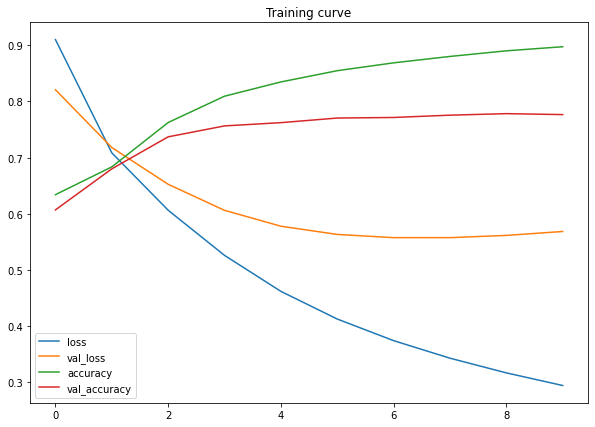

In [104]:
#Plot training curves
plot_training_curve(history_model_1)

### Model 2: Conv1D

In [105]:
# Build the model 
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=8, kernel_size=2, padding="same", activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [106]:
# Compile the model 
model_2.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [107]:
%%time
history_model_2 = model_2.fit(train_dataset,
                              epochs=500,
                              verbose=1,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

Epoch 1/500
275/275 [==============================] - 2s 5ms/step - loss: 0.8348 - accuracy: 0.6171 - val_loss: 0.6874 - val_accuracy: 0.6769
Epoch 2/500
275/275 [==============================] - 1s 5ms/step - loss: 0.6204 - accuracy: 0.7246 - val_loss: 0.6359 - val_accuracy: 0.7275
Epoch 3/500
275/275 [==============================] - 1s 5ms/step - loss: 0.5821 - accuracy: 0.7450 - val_loss: 0.6224 - val_accuracy: 0.7415
Epoch 4/500
275/275 [==============================] - 1s 5ms/step - loss: 0.5558 - accuracy: 0.7589 - val_loss: 0.6160 - val_accuracy: 0.7435
Epoch 5/500
275/275 [==============================] - 1s 4ms/step - loss: 0.5439 - accuracy: 0.7740 - val_loss: 0.6151 - val_accuracy: 0.7544
Epoch 6/500
275/275 [==============================] - 1s 5ms/step - loss: 0.5343 - accuracy: 0.7780 - val_loss: 0.6129 - val_accuracy: 0.7599
Epoch 7/500
275/275 [==============================] - 1s 5ms/step - loss: 0.5205 - accuracy: 0.7875 - val_loss: 0.6220 - val_accuracy: 0.7613

In [108]:
#Evaluate
model_2.evaluate(test_dataset)

92/92 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.7722


[0.590924859046936, 0.7721994519233704]

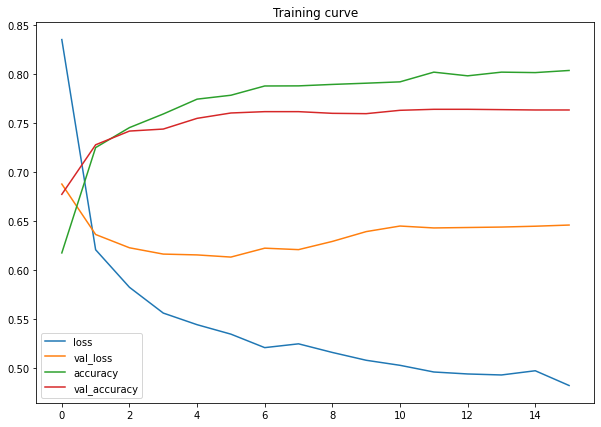

In [109]:
#Plot training curves
plot_training_curve(history_model_2)

### Model 3: LSTM

In [110]:
# Build the model 
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(8)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs)

In [111]:
# Compile the model 
model_3.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [112]:
%%time
history_model_3 = model_3.fit(train_dataset,
                              epochs=500,
                              verbose=1,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

Epoch 1/500
275/275 [==============================] - 4s 8ms/step - loss: 0.6893 - accuracy: 0.7261 - val_loss: 0.6395 - val_accuracy: 0.7749
Epoch 2/500
275/275 [==============================] - 2s 6ms/step - loss: 0.3882 - accuracy: 0.8703 - val_loss: 0.6640 - val_accuracy: 0.7708
Epoch 3/500
275/275 [==============================] - 2s 6ms/step - loss: 0.3313 - accuracy: 0.8982 - val_loss: 0.7224 - val_accuracy: 0.7715
Epoch 4/500
275/275 [==============================] - 2s 6ms/step - loss: 0.2937 - accuracy: 0.9136 - val_loss: 0.7571 - val_accuracy: 0.7620
Epoch 5/500
275/275 [==============================] - 2s 6ms/step - loss: 0.2737 - accuracy: 0.9235 - val_loss: 0.8264 - val_accuracy: 0.7664
Epoch 6/500
275/275 [==============================] - 2s 6ms/step - loss: 0.2489 - accuracy: 0.9325 - val_loss: 0.8592 - val_accuracy: 0.7613

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/500
275/275 [==============================] - 2s 6m

In [113]:
#Evaluate
model_3.evaluate(test_dataset)

92/92 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.7712


[0.6281599998474121, 0.7711748480796814]

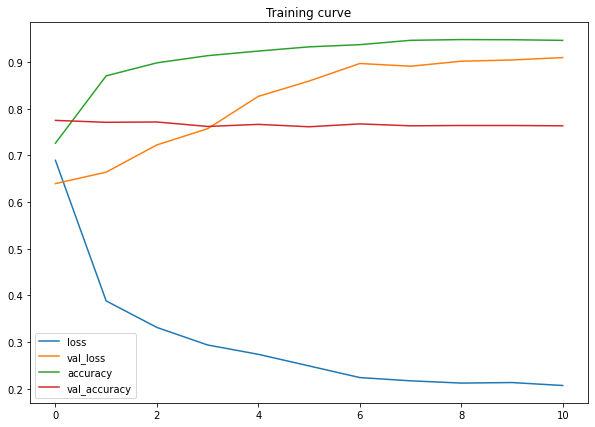

In [114]:
#Plot training curves
plot_training_curve(history_model_3)

### Model 4: GRU

In [115]:
# Build the model 
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(8)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_4 = tf.keras.Model(inputs, outputs)

In [116]:
# Compile the model 
model_4.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [117]:
%%time
history_model_4 = model_4.fit(train_dataset,
                              epochs=500,
                              verbose=1,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

Epoch 1/500
275/275 [==============================] - 3s 7ms/step - loss: 0.7572 - accuracy: 0.6755 - val_loss: 0.7301 - val_accuracy: 0.6892
Epoch 2/500
275/275 [==============================] - 2s 6ms/step - loss: 0.4998 - accuracy: 0.7670 - val_loss: 0.7721 - val_accuracy: 0.6865
Epoch 3/500
275/275 [==============================] - 2s 6ms/step - loss: 0.4487 - accuracy: 0.7903 - val_loss: 0.7909 - val_accuracy: 0.7155
Epoch 4/500
275/275 [==============================] - 1s 5ms/step - loss: 0.4114 - accuracy: 0.8141 - val_loss: 0.8166 - val_accuracy: 0.7251
Epoch 5/500
275/275 [==============================] - 2s 6ms/step - loss: 0.3711 - accuracy: 0.8552 - val_loss: 0.8219 - val_accuracy: 0.7572
Epoch 6/500
275/275 [==============================] - 2s 6ms/step - loss: 0.3163 - accuracy: 0.8930 - val_loss: 0.8350 - val_accuracy: 0.7544

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/500
275/275 [==============================] - 1s 5m

In [118]:
#Evaluate
model_4.evaluate(test_dataset)

92/92 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.7070


[0.7004159688949585, 0.7069672346115112]

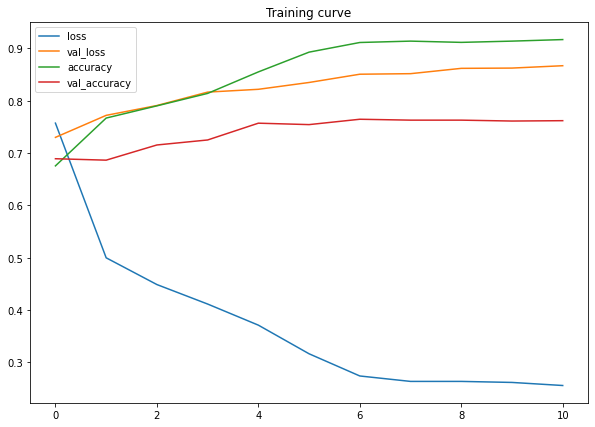

In [119]:
#Plot training curves
plot_training_curve(history_model_4)

### Model 5: Feature Extraction

In [120]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [190]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dropout(0.2)(pretrained_embedding)
x = layers.Dense(4, activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),
                     bias_regularizer=tf.keras.regularizers.l2(1e-4),
                     activity_regularizer=tf.keras.regularizers.l2(1e-5))(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_5 = tf.keras.Model(inputs, outputs)

In [191]:
# Compile the model 
model_5.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [192]:
%%time
history_model_5 = model_5.fit(train_dataset_with_stopwords,
                              epochs=500,
                              verbose=1,
                              validation_data=val_dataset_with_stopwords,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

Epoch 1/500
275/275 [==============================] - 5s 14ms/step - loss: 0.8867 - accuracy: 0.6564 - val_loss: 0.7355 - val_accuracy: 0.6708
Epoch 2/500
275/275 [==============================] - 3s 12ms/step - loss: 0.6701 - accuracy: 0.7201 - val_loss: 0.6287 - val_accuracy: 0.7439
Epoch 3/500
275/275 [==============================] - 3s 13ms/step - loss: 0.6131 - accuracy: 0.7491 - val_loss: 0.5896 - val_accuracy: 0.7657
Epoch 4/500
275/275 [==============================] - 4s 13ms/step - loss: 0.5932 - accuracy: 0.7559 - val_loss: 0.5677 - val_accuracy: 0.7753
Epoch 5/500
275/275 [==============================] - 4s 13ms/step - loss: 0.5718 - accuracy: 0.7620 - val_loss: 0.5548 - val_accuracy: 0.7783
Epoch 6/500
275/275 [==============================] - 3s 12ms/step - loss: 0.5624 - accuracy: 0.7739 - val_loss: 0.5418 - val_accuracy: 0.7852
Epoch 7/500
275/275 [==============================] - 3s 13ms/step - loss: 0.5644 - accuracy: 0.7625 - val_loss: 0.5416 - val_accuracy:

In [193]:
#Evaluate
model_5.evaluate(test_dataset_with_stopwords)

92/92 [==============================] - 1s 10ms/step - loss: 0.4886 - accuracy: 0.8050


[0.48858967423439026, 0.8049863576889038]

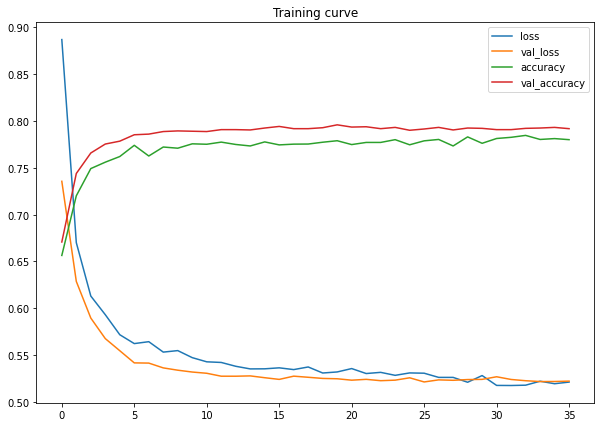

In [194]:
#Plot training curves
plot_training_curve(history_model_5)